In [1]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [2]:
df_train = pd.read_csv("./dataset/train_features.csv")
df_test = pd.read_csv("./dataset/test_features.csv")

In [3]:
df_train

,letter_slant,line_slant,letter_size,word_spacing,personality
0,13.980637,1.075874,22.50,13.0,Agreeableness
1,-11.017610,4.004173,18.50,25.0,Agreeableness
2,24.000325,-0.836375,10.50,1.0,Agreeableness
3,0.028662,-2.013475,28.00,1.0,Agreeableness
4,9.966474,0.000000,51.00,25.0,Agreeableness
...,...,...,...,...,...
172,6.982799,-4.124767,33.50,25.0,Openness
173,10.989471,0.000000,137.50,19.0,Openness
174,-6.001505,1.084344,65.00,44.0,Openness
175,15.969017,-0.804346,36.75,14.0,Openness


In [4]:
df_test

,letter_slant,line_slant,letter_size,word_spacing,personality
0,9.971437,0.000000,89.75,24.5,Agreeableness
1,-6.001505,0.000000,85.50,45.0,Agreeableness
2,9.994699,0.000000,37.50,55.0,Agreeableness
3,1.003577,1.937840,34.50,85.0,Agreeableness
4,6.982799,1.145763,193.50,27.0,Agreeableness
5,-1.003075,0.000000,43.00,73.5,Agreeableness
6,4.992081,1.086656,9.00,35.0,Agreeableness
7,4.992081,-1.023764,10.50,38.5,Agreeableness
8,9.994699,0.000000,69.00,110.0,Conscientiousness
9,-4.992081,1.677468,172.00,57.0,Conscientiousness


In [5]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  177 non-null    float64
 1   line_slant    176 non-null    float64
 2   letter_size   177 non-null    float64
 3   word_spacing  177 non-null    float64
 4   personality   177 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  44 non-null     float64
 1   line_slant    44 non-null     float64
 2   letter_size   44 non-null     float64
 3   word_spacing  44 non-null     float64
 4   personality   44 non-null     object 
dtypes: float64(4), object(1)
memory usage: 1.8+ KB
None


In [6]:
df_train.isnull().sum()

letter_slant    0
line_slant      1
letter_size     0
word_spacing    0
personality     0
dtype: int64

In [7]:
df_test.isnull().sum()

letter_slant    0
line_slant      0
letter_size     0
word_spacing    0
personality     0
dtype: int64

In [8]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [9]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 176
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  176 non-null    float64
 1   line_slant    176 non-null    float64
 2   letter_size   176 non-null    float64
 3   word_spacing  176 non-null    float64
 4   personality   176 non-null    object 
dtypes: float64(4), object(1)
memory usage: 8.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  44 non-null     float64
 1   line_slant    44 non-null     float64
 2   letter_size   44 non-null     float64
 3   word_spacing  44 non-null     float64
 4   personality   44 non-null     object 
dtypes: float64(4), object(1)
memory usage: 1.8+ KB
None


In [10]:
x_train = df_train.drop('personality', axis=1)
y_train = df_train['personality']
x_test = df_test.drop('personality', axis=1)
y_test = df_test['personality']

In [14]:
dtree = DecisionTreeClassifier()
dtree_res = dtree.fit(x_train, y_train)

In [15]:
y_pred = dtree.predict(x_test)
print(y_pred)

['Neuroticism' 'Openness' 'Agreeableness' 'Conscientiousness'
 'Conscientiousness' 'Agreeableness' 'Openness' 'Openness' 'Neuroticism'
 'Conscientiousness' 'Neuroticism' 'Agreeableness' 'Agreeableness'
 'Conscientiousness' 'Agreeableness' 'Openness' 'Openness' 'Neuroticism'
 'Neuroticism' 'Agreeableness' 'Neuroticism' 'Extraversion'
 'Agreeableness' 'Openness' 'Openness' 'Neuroticism' 'Neuroticism'
 'Openness' 'Conscientiousness' 'Openness' 'Openness' 'Neuroticism'
 'Extraversion' 'Neuroticism' 'Extraversion' 'Neuroticism'
 'Conscientiousness' 'Openness' 'Conscientiousness' 'Conscientiousness'
 'Agreeableness' 'Agreeableness' 'Conscientiousness' 'Openness']


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.2727272727272727

In [17]:
dtree.feature_importances_

array([0.32264959, 0.19608592, 0.34250714, 0.13875735])

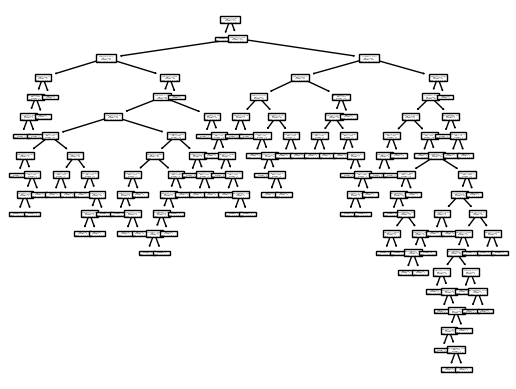

In [24]:
tree.plot_tree(dtree_res, feature_names=list(df_test.columns))
# plt.savefig(sys.stdout.buffer)
sys.stdout.flush()